# Aufgabe 4

### Übung 1

Entwickeln Sie ein LSTM-Modell, um zukünftige Aktienkurse basierend auf historischen Daten zu prognostizieren. Verwenden Sie die Datei sp500_stocks.csv für die Zeitreihendaten eines Unternehmens Ihrer Wahl.

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('../../Data/sp500_stocks/sp500_stocks.csv')

# Select a specific company (e.g., 'AAPL' for Apple)
df_company = df[df['Symbol'] == 'AAPL']

# Use only the closing price as a feature
closing_prices = df_company['Close'].values.reshape(-1, 1)

# Normalize data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

# Function to prepare sequences of a given length from the data
def prepare_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])  # Input sequence
        y.append(data[i+n_steps])  # Corresponding target value
    return np.array(X), np.array(y)

n_steps = 10  # Number of timesteps per input sequence
X, y = prepare_sequences(closing_prices_scaled, n_steps)

# Define LSTM model architecture for regression
model = tf.keras.Sequential([
    
# Your code here

    ])

# and here

Lösung:

Epoch 1/100
89/89 [==============================] - 2s 6ms/step - loss: 0.0043
Epoch 2/100
89/89 [==============================] - 1s 6ms/step - loss: 1.2009e-04
Epoch 3/100
89/89 [==============================] - 1s 6ms/step - loss: 1.1420e-04
Epoch 4/100
89/89 [==============================] - 1s 6ms/step - loss: 1.1181e-04
Epoch 5/100
89/89 [==============================] - 1s 6ms/step - loss: 1.0478e-04
Epoch 6/100
89/89 [==============================] - 1s 6ms/step - loss: 1.0781e-04
Epoch 7/100
89/89 [==============================] - 1s 6ms/step - loss: 1.1600e-04
Epoch 8/100
89/89 [==============================] - 1s 6ms/step - loss: 1.0755e-04
Epoch 9/100
89/89 [==============================] - 1s 6ms/step - loss: 1.1146e-04
Epoch 10/100
89/89 [==============================] - 1s 6ms/step - loss: 1.0178e-04
Epoch 11/100
89/89 [==============================] - 1s 6ms/step - loss: 1.1217e-04
Epoch 12/100
89/89 [==============================] - 1s 6ms/step - loss: 1.03

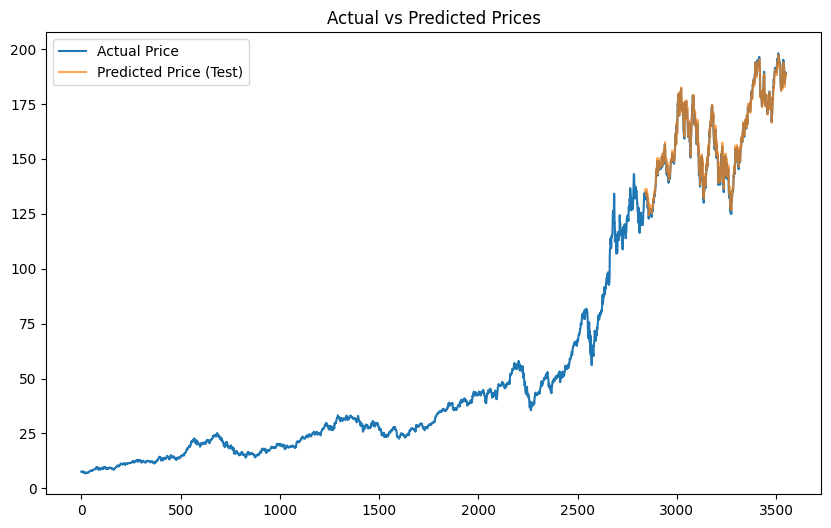

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('../../Data/sp500_stocks/sp500_stocks.csv')

# Select a specific company (e.g., 'AAPL' for Apple)
df_company = df[df['Symbol'] == 'AAPL']

# Use only the closing price as a feature
closing_prices = df_company['Close'].values.reshape(-1, 1)

# Normalize data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

# Function to prepare sequences of a given length from the data
def prepare_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])  # Input sequence
        y.append(data[i+n_steps])  # Corresponding target value
    return np.array(X), np.array(y)

n_steps = 10  # Number of timesteps per input sequence
# Split data into training and testing sets
split_index = int(len(closing_prices_scaled) * 0.8)  # Assuming last 20% for test

X, y = prepare_sequences(closing_prices_scaled, n_steps)

# Correct split based on updated split_index, ensuring last part of data is test set
X_train, X_test = X[:split_index - n_steps], X[split_index - n_steps:]
y_train, y_test = y[:split_index - n_steps], y[split_index - n_steps:]
# Define LSTM model architecture for regression
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(n_steps, 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training set
model.fit(X_train, y_train, epochs=100, verbose=1)

# Make predictions on the test set
predicted_prices_test = model.predict(X_test)
predicted_prices_test = scaler.inverse_transform(predicted_prices_test)
start_index_for_predictions = len(closing_prices_scaled) - len(predicted_prices_test)

# Visualize actual vs. predicted closing prices
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(closing_prices_scaled), label='Actual Price')
plt.plot(np.arange(start_index_for_predictions, start_index_for_predictions + len(predicted_prices_test)), predicted_prices_test, label='Predicted Price (Test)', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()

In [18]:
# Number of future steps to predict
X_future = 10
# Start with the last n_steps from the test set
input_seq = X_test[-1].reshape((1, n_steps, 1))

# Store the predictions
future_predictions = []

for _ in range(X_future):
    # Predict the next step
    next_step_prediction = model.predict(input_seq)
    
    # Append the prediction (while transforming it back to the original scale)
    future_predictions.append(scaler.inverse_transform(next_step_prediction)[0, 0])
    
    # Update the input sequence for the next prediction
    input_seq = np.append(input_seq[:, 1:, :], next_step_prediction.reshape((1, 1, 1)), axis=1)

future_predictions

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


[187.14182,
 185.99243,
 184.98723,
 184.15013,
 183.47348,
 182.91574,
 182.44513,
 182.02635,
 181.63219,
 181.24881]

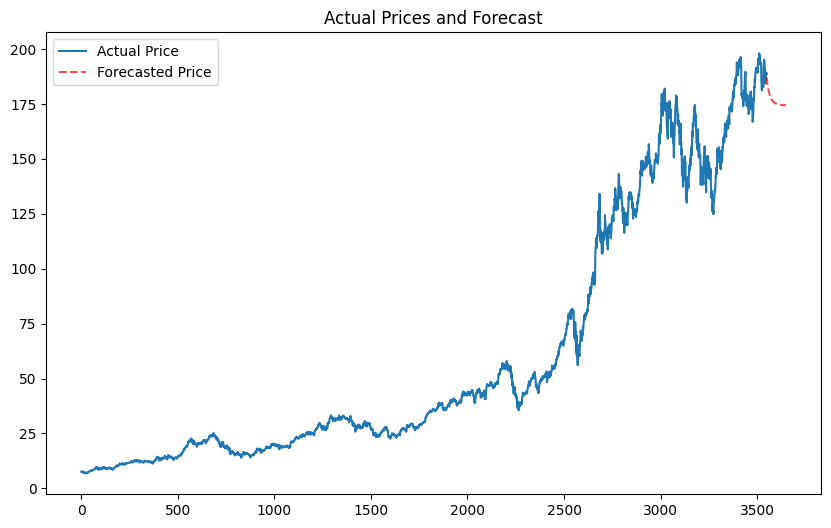

In [14]:
# Visualize the forecast
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(closing_prices_scaled), label='Actual Price')
# Plot the forecasted prices. The X-axis values start after the last actual price
plt.plot(np.arange(len(closing_prices_scaled), len(closing_prices_scaled) + X_future), future_predictions, label='Forecasted Price', alpha=0.7, linestyle='--', color='red')
plt.legend()
plt.title('Actual Prices and Forecast')
plt.show()

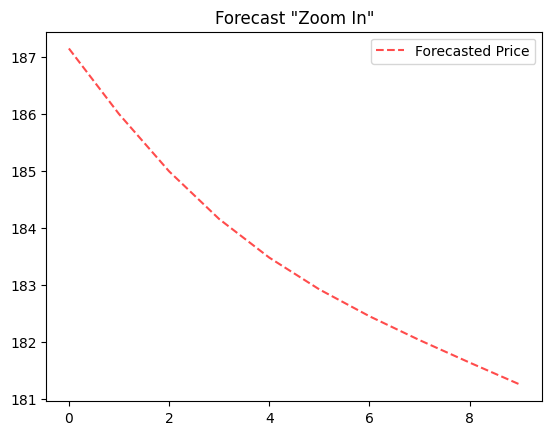

In [19]:
plt.plot(future_predictions, label='Forecasted Price', alpha=0.7, linestyle='--', color='red')
plt.legend()
plt.title('Forecast "Zoom In"')
plt.show()

In [21]:
df_company[['Date','Close']][-10:]

,Date,Close
141990,2024-01-29,191.729996
141991,2024-01-30,188.039993
141992,2024-01-31,184.399994
141993,2024-02-01,186.860001
141994,2024-02-02,185.850006
141995,2024-02-05,187.679993
141996,2024-02-06,189.300003
141997,2024-02-07,189.410004
141998,2024-02-08,188.320007
141999,2024-02-09,188.850006


### Übung 2

Klassifizieren Sie den Trend von Aktienkursen als steigend oder fallend. Nutzen Sie die Schlusskurse aus sp500_stocks.csv für die letzten N Tage, um zu bestimmen, ob der Preis am (N+1)-ten Tag höher oder niedriger sein wird.

In [ ]:
# Load Data
df = pd.read_csv('../../Data/sp500_stocks/sp500_stocks.csv')

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('../../Data/sp500_stocks/sp500_stocks.csv')
df_company = df[df['Symbol'] == 'AAPL']

# Use closing prices as the main feature
closing_prices = df_company['Close'].values.reshape(-1, 1)

# Normalize the closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

# Function to prepare data sequences and their labels for classification
def prepare_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])
        # Label as 1 (increasing) if the next value is higher than the last value in the sequence, else 0 (decreasing)
        y.append(1 if data[i, 0] > data[i-1, 0] else 0)
    return np.array(X), np.array(y)

n_steps = 10
X, y = prepare_sequences(scaled_prices, n_steps)

# Reshape X to fit the LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model for binary classification
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(n_steps, 1)),  # LSTM layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['# YOUR CODE'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Epoch 1/50
89/89 [==============================] - 3s 15ms/step - loss: 0.6780 - accuracy: 0.5939 - val_loss: 0.6757 - val_accuracy: 0.5932
Epoch 2/50
89/89 [==============================] - 1s 9ms/step - loss: 0.6769 - accuracy: 0.5939 - val_loss: 0.6756 - val_accuracy: 0.5932
Epoch 3/50
89/89 [==============================] - 1s 9ms/step - loss: 0.6769 - accuracy: 0.5939 - val_loss: 0.6758 - val_accuracy: 0.5932
Epoch 4/50
89/89 [==============================] - 1s 9ms/step - loss: 0.6764 - accuracy: 0.5939 - val_loss: 0.6763 - val_accuracy: 0.5932
Epoch 5/50
89/89 [==============================] - 1s 9ms/step - loss: 0.6760 - accuracy: 0.5939 - val_loss: 0.6755 - val_accuracy: 0.5932
Epoch 6/50
89/89 [==============================] - 1s 9ms/step - loss: 0.6760 - accuracy: 0.5939 - val_loss: 0.6756 - val_accuracy: 0.5932
Epoch 7/50
89/89 [==============================] - 1s 9ms/step - loss: 0.6755 - accuracy: 0.5939 - val_loss: 0.6757 - val_accuracy: 0.5932
Epoch 8/50
89/89 [=

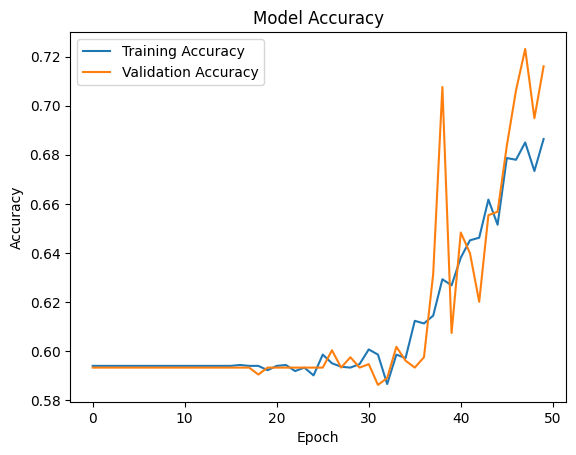

In [22]:
# SOLUTION! First try on your own

# Load Data
df = pd.read_csv('../../Data/sp500_stocks/sp500_stocks.csv')

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load Data
df = pd.read_csv('../../Data/sp500_stocks/sp500_stocks.csv')

# Assuming 'AAPL' data is used for this example
df_company = df[df['Symbol'] == 'AAPL']

# Use closing prices as the main feature
closing_prices = df_company['Close'].values.reshape(-1, 1)

# Normalize the closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

# Function to prepare data sequences and their labels for classification
def prepare_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        # Extract the sequence from current position - n_steps to current position
        sequence = data[i-n_steps:i, 0]
        X.append(sequence)
        # Label as 1 (increasing) if the last data point in the sequence is higher than the first data point, else 0
        y.append(1 if sequence[-1] > sequence[0] else 0)
    return np.array(X), np.array(y)

n_steps = 10
X, y = prepare_sequences(scaled_prices, n_steps)

# Reshape X to fit the LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adjust the learning rate
optimizer = Adam(learning_rate=0.001)  # Example learning rate

# Define the LSTM model for binary classification
# Change LSTM activation function to tanh
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='tanh', return_sequences=True, input_shape=(n_steps, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences=True, activation='tanh'),
    tf.keras.layers.LSTM(25, return_sequences=False, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the adjusted optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

23/23 [==============================] - 1s 2ms/step


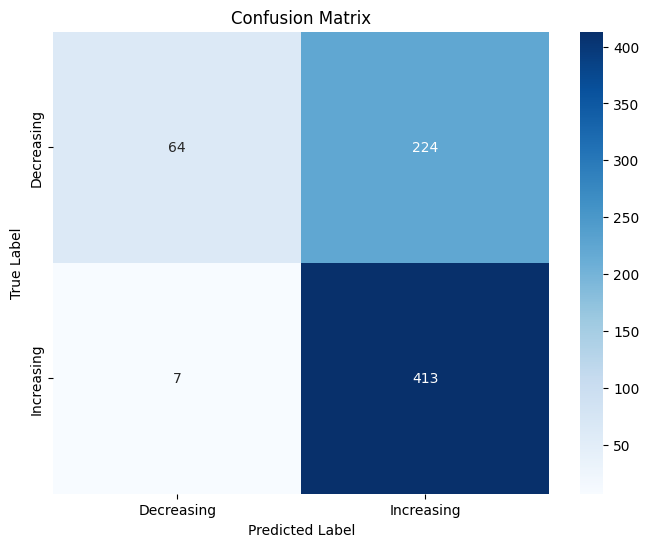

In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate binary predictions
threshold = 0.5  # Threshold to classify predictions into binary outcomes
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Decreasing', 'Increasing'], yticklabels=['Decreasing', 'Increasing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Label/Class: 1
Amount of sequences: 3548


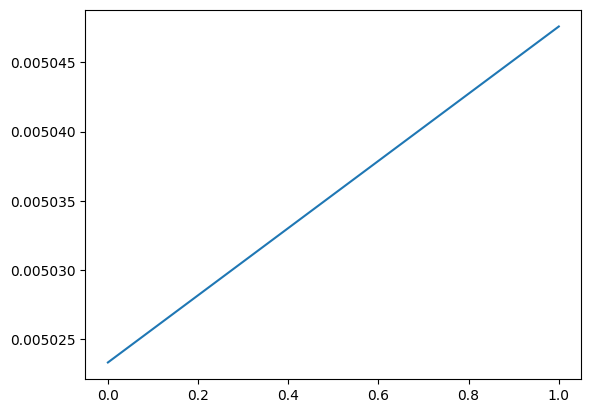

In [137]:
# Display a training sequence
selected_sequence = 42 # Pick a sample sequence
print(f'Label/Class: {y[selected_sequence]}\nAmount of sequences: {len(X)}')
plt.plot(X[selected_sequence])

### Übung 3

- Wie hoch ist die Accuracy der Klassifikation? 
- Wie bewerten Sie diese bzw. was kann man davon interpretieren?
- Wie könnte man diese erhöhen?